In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
bmp = pd.read_csv('/Users/zachkeskinen/Documents/toolik/barometer/data/bmp280-2023-04-02T19:43:51', index_col = 0, parse_dates = True)
dps = pd.read_csv('/Users/zachkeskinen/Documents/toolik/barometer/data/dps310-2023-04-02T19:43:53', index_col = 0, parse_dates = True)

In [110]:
comb = bmp.resample('1s').mean().copy()
comb['dps'] = dps.resample('1s').mean()

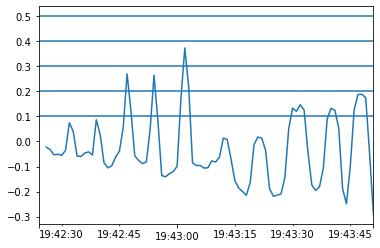

In [115]:
comb['dps'].plot()
plt.axhline(0.1)
plt.axhline(0.2)
plt.axhline(0.3)
plt.axhline(0.4)
plt.axhline(0.5)

0.025   -0.309401
0.975    0.225585
dtype: float64
0.1618967559422301


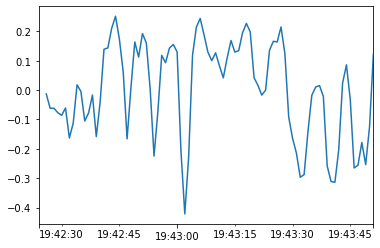

In [112]:
corrected = (comb['0'] - comb['dps'])
corrected = corrected - corrected.mean()
corrected.plot()
# print(corrected.mean())
print(corrected.quantile([0.025,0.975]))
print(corrected.std())